# Tent & Norm Adaptation

In [95]:
import pandas as pd

record = pd.read_csv('./result/audio-mnist/tent/pre_train/training_records.csv')
record.head()

,Unnamed: 0,type,step,accuracy,loss
0,0,train,0,12.5000,2.299448
1,1,train,1,9.3750,2.300853
2,2,train,2,15.6250,2.295353
3,3,train,3,14.0625,2.295773
4,4,train,4,15.6250,2.294219


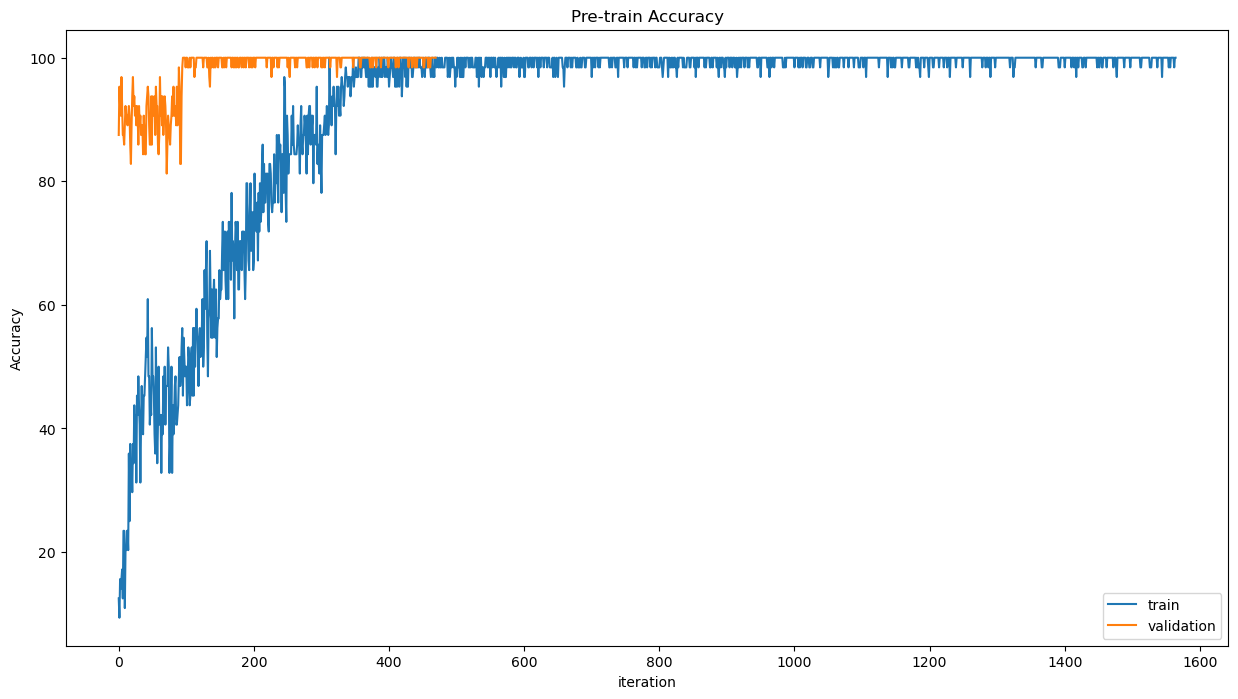

In [96]:
import matplotlib.pyplot as plt

train_record = record[record['type'] == 'train']
val_record = record[record['type'] == 'validation']
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['accuracy'], label='train')
plt.plot(val_record['step'], val_record['accuracy'], label='validation')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Pre-train Accuracy')
plt.legend(loc='lower right')
plt.show()

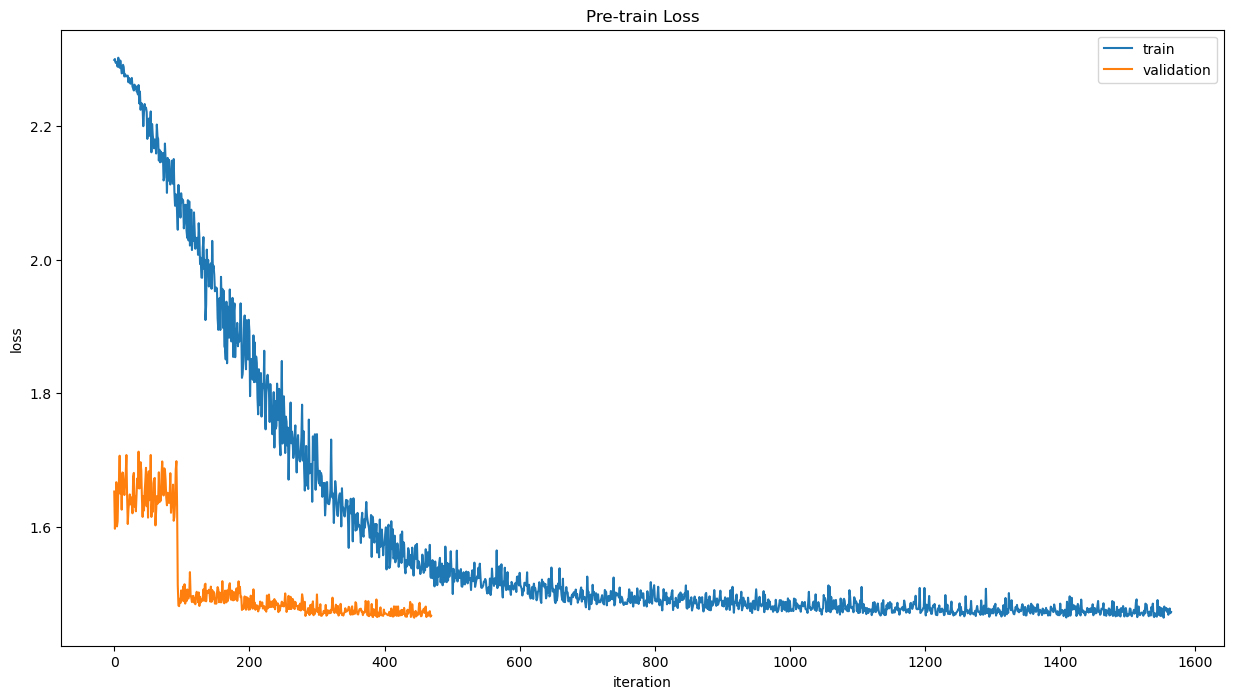

In [97]:
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['loss'], label='train')
plt.plot(val_record['step'], val_record['loss'], label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Pre-train Loss')
plt.legend()
plt.show()

# Test-Time Training (TTT)

In [98]:
record = pd.read_csv('./result/audio-mnist/ttt/pre_time_shift_train/ts_bn_accu_record.csv')
record.head()

,Unnamed: 0,dataset,type,step,accuracy,loss
0,0,audio-mnist,cls,0,9.523810,2.365855
1,1,audio-mnist,ssh,0,37.566138,1.100455
2,2,audio-mnist,cls,1,11.111111,2.282394
3,3,audio-mnist,ssh,1,70.634921,0.827100
4,4,audio-mnist,cls,2,18.253968,2.224236


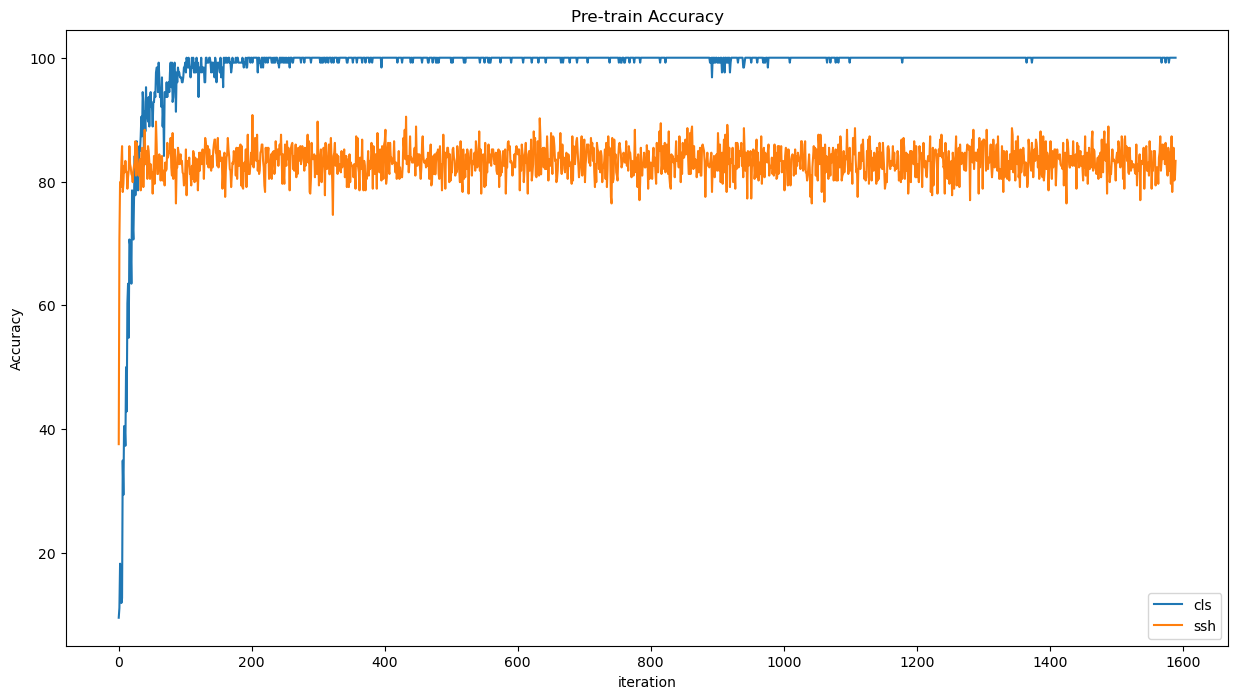

In [99]:
train_record = record[record['type'] == 'cls']
val_record = record[record['type'] == 'ssh']
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['accuracy'], label='cls')
plt.plot(val_record['step'], val_record['accuracy'], label='ssh')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Pre-train Accuracy')
plt.legend(loc='lower right')
plt.show()

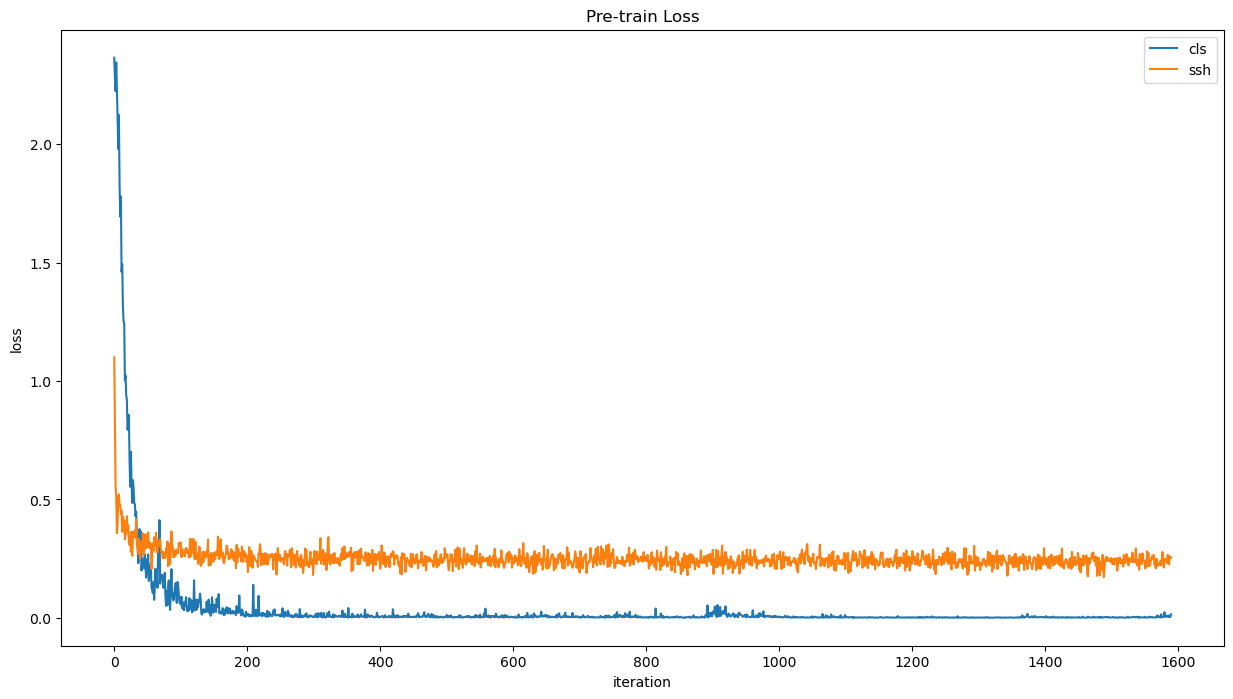

In [100]:
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['loss'], label='cls')
plt.plot(val_record['step'], val_record['loss'], label='ssh')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Pre-train Loss')
plt.legend()
plt.show()

# Test dataset accuracy comparing

In [101]:
import os

def combine_csvs(root_path: str) -> pd.DataFrame:
    records = []
    for sub_path in os.listdir(root_path):
        if 'accuracy_record' in sub_path and sub_path.endswith('.csv'):
            record = pd.read_csv(os.path.join(root_path, sub_path), index_col=0)
            records.append(record)
    return pd.concat(records, axis=0, ignore_index=True)

tent_analysis_root_path = './result/audio-mnist/tent/analysis'
tent_analysis_records = combine_csvs(tent_analysis_root_path)
tent_analysis_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,restnet50,NaN,NaN,95.69,4.31,0.0000,25567042
1,audio-mnist,restnet50,NaN,doing_the_dishes-rand,14.50,85.50,3.0000,25567042
2,audio-mnist,restnet50,Tent Adaptation,doing_the_dishes-rand,53.63,46.37,3.0000,25567042
3,audio-mnist,restnet50,Norm Adaptation,doing_the_dishes-rand,53.94,46.06,3.0000,25567042
4,audio-mnist,restnet50,NaN,exercise_bike-rand,19.36,80.64,3.0000,25567042
5,audio-mnist,restnet50,Tent Adaptation,exercise_bike-rand,66.37,33.63,3.0000,25567042
6,audio-mnist,restnet50,Norm Adaptation,exercise_bike-rand,64.08,35.92,3.0000,25567042
7,audio-mnist,restnet50,NaN,running_tap-rand,28.77,71.23,3.0000,25567042
8,audio-mnist,restnet50,Tent Adaptation,running_tap-rand,71.18,28.82,3.0000,25567042
9,audio-mnist,restnet50,Norm Adaptation,running_tap-rand,66.97,33.03,3.0000,25567042


In [102]:
ttt_analysis_root_path = './result/audio-mnist/ttt/time_shift_analysis'
ttt_time_shift_records = combine_csvs(ttt_analysis_root_path)
ttt_time_shift_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,RestNet_base,NaN,NaN,93.52,6.48,0.0000,737005
1,audio-mnist,RestNet_base,NaN,doing_the_dishes-rand,12.89,87.11,3.0000,737005
2,audio-mnist,RestNet_base,"TTT, ts, bn, online",doing_the_dishes-rand,14.19,85.81,3.0000,737005
3,audio-mnist,RestNet_base,NaN,exercise_bike-rand,10.80,89.20,3.0000,737005
4,audio-mnist,RestNet_base,"TTT, ts, bn, online",exercise_bike-rand,10.19,89.81,3.0000,737005
5,audio-mnist,RestNet_base,NaN,running_tap-rand,14.81,85.19,3.0000,737005
6,audio-mnist,RestNet_base,"TTT, ts, bn, online",running_tap-rand,19.94,80.06,3.0000,737005
7,audio-mnist,RestNet_base,NaN,NaN,93.70,6.30,0.0000,737005
8,audio-mnist,RestNet_base,NaN,gaussian_noise,30.07,69.93,0.0050,737005
9,audio-mnist,RestNet_base,"TTT, ts, bn, online",gaussian_noise,40.62,59.38,0.0050,737005


In [103]:
ttt_analysis_root_path = './result/audio-mnist/ttt/angles_shift_analysis'
ttt_angles_shift_records = combine_csvs(ttt_analysis_root_path)
ttt_angles_shift_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,RestNet_base,NaN,NaN,98.49,1.51,0.0000,740078
1,audio-mnist,RestNet_base,NaN,gaussian_noise,35.88,64.12,0.0050,740078
2,audio-mnist,RestNet_base,"TTT, as, bn, online",gaussian_noise,44.07,55.93,0.0050,740078
3,audio-mnist,RestNet_base,NaN,NaN,98.43,1.57,0.0000,740078
4,audio-mnist,RestNet_base,NaN,gaussian_noise,60.99,39.01,0.0025,740078
5,audio-mnist,RestNet_base,"TTT, as, bn, online",gaussian_noise,74.35,25.65,0.0025,740078


In [104]:
conmix_analysis_root_path = './result/audio-mnist/CoNMix/analysis'
conmix_analysis_records = combine_csvs(conmix_analysis_root_path)
conmix_analysis_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,ViT,NaN,NaN,97.34,2.66,0.0000,103687828
1,audio-mnist,ViT,NaN,doing_the_dishes,58.57,41.43,10.0000,103687828
2,audio-mnist,ViT,CoNMix,doing_the_dishes,93.73,6.27,10.0000,103687828
3,audio-mnist,ViT,NaN,NaN,97.34,2.66,0.0000,103687828
4,audio-mnist,ViT,NaN,doing_the_dishes,34.33,65.67,3.0000,103687828
5,audio-mnist,ViT,CoNMix,doing_the_dishes,87.15,12.85,3.0000,103687828
6,audio-mnist,ViT,NaN,NaN,97.34,2.66,0.0000,103687828
7,audio-mnist,ViT,NaN,gaussian_noise,82.77,17.23,0.0025,103687828
8,audio-mnist,ViT,CoNMix,gaussian_noise,97.31,2.69,0.0025,103687828
9,audio-mnist,ViT,NaN,NaN,97.34,2.66,0.0000,103687828


# AudioMNIST: 0.0025 Severity Level Analysis

In [105]:
def search(df: pd.DataFrame, dataset=None, algorithm=None, tta_operation=None, corruption=None, severity_level=None):
    if dataset is not None:
        if dataset is not pd.NA:
            df = df[df['dataset'] == dataset]
        else:
            df = df[df['dataset'].isna()]
    if algorithm is not None:
        if algorithm is not pd.NA:
            df = df[df['algorithm'] == algorithm]
        else:
            df = df[df['algorithm'].isna()]
    if tta_operation is not None:
        if tta_operation is not pd.NA:
            df = df[df['tta-operation'] == tta_operation]
        else:
            df = df[df['tta-operation'].isna()]
    if corruption is not None:
        if corruption is not pd.NA:
            df = df[df['corruption'] == corruption]
        else:
            df = df[df['corruption'].isna()]
    if severity_level is not None:
        if severity_level is not pd.NA:
            df = df[df['severity level'] == severity_level]
        else:
            df = df[df['severity level'].isna()]
    return df

model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
# model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by angle shift', ttt_angles_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=4, column='corrupted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.0025, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.0025, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.0025, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.0025, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=5, column='adapted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.0025, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.0025, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.0025, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.0025, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation='TTT, as, bn, online', corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix', corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    ])
model_weights

,TTA type,model,number of weight,origin (%),corrupted (%),adapted (%)
0,tent adapt,cnn,25404,96.09,11.20,79.40
1,tent adapt,RestNet50+,25567042,95.69,32.46,92.32
2,norm adapt,cnn,25404,96.09,11.20,78.97
3,norm adapt,RestNet50+,25567042,95.69,32.46,90.01
4,TTT,Transfer Learning by time shift,737005,93.52,45.56,57.35
5,CoNMix,R50+ViT-B_16,103687828,97.34,82.77,97.31


# AudioMNIST: 0.005 Severity Level Analysis

In [106]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
# model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by angle shift', ttt_angles_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=4, column='corrupted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=5, column='adapted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation='TTT, as, bn, online', corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix', corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    ])
model_weights

,TTA type,model,number of weight,origin (%),corrupted (%),adapted (%)
0,tent adapt,cnn,25404,96.09,10.04,67.02
1,tent adapt,RestNet50+,25567042,95.69,31.11,84.68
2,norm adapt,cnn,25404,96.09,10.04,66.86
3,norm adapt,RestNet50+,25567042,95.69,31.11,80.66
4,TTT,Transfer Learning by time shift,737005,93.52,30.07,40.62
5,CoNMix,R50+ViT-B_16,103687828,97.34,72.42,95.39


## Doing the dishes

In [107]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='dataset', value=['audio mnist' for i in range(6)])
model_weights.insert(loc=4, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=5, column='corrupted (3.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, tta_operation=pd.NA, corruption='doing_the_dishes-rand')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='doing_the_dishes-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='doing_the_dishes-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='doing_the_dishes-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='doing_the_dishes-rand', severity_level=3.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='doing_the_dishes', severity_level=3.0)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=6, column='adapted (3.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='doing_the_dishes-rand', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='doing_the_dishes-rand', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='doing_the_dishes-rand', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='doing_the_dishes-rand', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='doing_the_dishes-rand', severity_level=3.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix', corruption='doing_the_dishes', severity_level=3.0)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=7, column='corrupted (10.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, tta_operation=pd.NA, corruption='doing_the_dishes-rand')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='doing_the_dishes-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='doing_the_dishes-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='doing_the_dishes-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='doing_the_dishes-rand', severity_level=10.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='doing_the_dishes', severity_level=10.0)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=8, column='adapted (10.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='doing_the_dishes-rand', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='doing_the_dishes-rand', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='doing_the_dishes-rand', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='doing_the_dishes-rand', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='doing_the_dishes-rand', severity_level=10.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix', corruption='doing_the_dishes', severity_level=10.0)['accuracy'].iloc[0],
    ])
model_weights

,TTA type,model,number of weight,dataset,origin (%),corrupted (3.0),adapted (3.0),corrupted (10.0),adapted (10.0)
0,tent adapt,cnn,25404,audio mnist,96.09,14.60,33.13,16.95,60.85
1,tent adapt,RestNet50+,25567042,audio mnist,95.69,14.50,53.63,32.14,82.77
2,norm adapt,cnn,25404,audio mnist,96.09,14.60,34.05,16.95,58.15
3,norm adapt,RestNet50+,25567042,audio mnist,95.69,14.50,53.94,32.14,80.66
4,TTT,Transfer Learning by time shift,737005,audio mnist,93.52,12.89,14.19,33.53,46.15
5,CoNMix,R50+ViT-B_16,103687828,audio mnist,97.34,34.33,87.15,58.57,93.73


## Exercise bike

In [108]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='dataset', value=['audio mnist' for i in range(6)])
model_weights.insert(loc=4, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=5, column='corrupted (3.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, tta_operation=pd.NA, corruption='exercise_bike-rand')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='exercise_bike-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='exercise_bike-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='exercise_bike-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='exercise_bike-rand', severity_level=3.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='exercise_bike', severity_level=3.0)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=6, column='adapted (3.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='exercise_bike-rand', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='exercise_bike-rand', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='exercise_bike-rand', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='exercise_bike-rand', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='exercise_bike-rand', severity_level=3.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix', corruption='exercise_bike', severity_level=3.0)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=7, column='corrupted (10.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, tta_operation=pd.NA, corruption='exercise_bike-rand')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='exercise_bike-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='exercise_bike-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='exercise_bike-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='exercise_bike-rand', severity_level=10.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='exercise_bike', severity_level=10.0)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=8, column='adapted (10.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='exercise_bike-rand', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='exercise_bike-rand', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='exercise_bike-rand', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='exercise_bike-rand', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='exercise_bike-rand', severity_level=10.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix', corruption='exercise_bike', severity_level=10.0)['accuracy'].iloc[0],
    ])
model_weights

,TTA type,model,number of weight,dataset,origin (%),corrupted (3.0),adapted (3.0),corrupted (10.0),adapted (10.0)
0,tent adapt,cnn,25404,audio mnist,96.09,18.53,36.96,16.64,61.16
1,tent adapt,RestNet50+,25567042,audio mnist,95.69,19.36,66.37,30.60,87.56
2,norm adapt,cnn,25404,audio mnist,96.09,18.53,38.26,16.64,59.29
3,norm adapt,RestNet50+,25567042,audio mnist,95.69,19.36,64.08,30.60,84.37
4,TTT,Transfer Learning by time shift,737005,audio mnist,93.52,10.80,10.19,44.64,48.54
5,CoNMix,R50+ViT-B_16,103687828,audio mnist,97.34,29.91,84.99,49.70,94.69


## Running tap

In [109]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='dataset', value=['audio mnist' for i in range(6)])
model_weights.insert(loc=4, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=5, column='corrupted (3.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, tta_operation=pd.NA, corruption='running_tap-rand')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='running_tap-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='running_tap-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='running_tap-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='running_tap-rand', severity_level=3.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='running_tap', severity_level=3.0)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=6, column='adapted (3.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='running_tap-rand', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='running_tap-rand', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='running_tap-rand', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='running_tap-rand', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='running_tap-rand', severity_level=3.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix', corruption='running_tap', severity_level=3.0)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=7, column='corrupted (10.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, tta_operation=pd.NA, corruption='running_tap-rand')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='running_tap-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='running_tap-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='running_tap-rand', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='running_tap-rand', severity_level=10.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='running_tap', severity_level=10.0)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=8, column='adapted (10.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='running_tap-rand', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='running_tap-rand', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='running_tap-rand', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='running_tap-rand', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='running_tap-rand', severity_level=10.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix', corruption='running_tap', severity_level=10.0)['accuracy'].iloc[0],
    ])
model_weights

,TTA type,model,number of weight,dataset,origin (%),corrupted (3.0),adapted (3.0),corrupted (10.0),adapted (10.0)
0,tent adapt,cnn,25404,audio mnist,96.09,20.24,46.49,21.46,68.56
1,tent adapt,RestNet50+,25567042,audio mnist,95.69,28.77,71.18,32.66,87.49
2,norm adapt,cnn,25404,audio mnist,96.09,20.24,45.99,21.46,68.42
3,norm adapt,RestNet50+,25567042,audio mnist,95.69,28.77,66.97,32.66,85.41
4,TTT,Transfer Learning by time shift,737005,audio mnist,93.52,14.81,19.94,46.02,48.56
5,CoNMix,R50+ViT-B_16,103687828,audio mnist,97.34,28.10,87.25,48.55,94.63


# Speech Commands Datasets Analysis

In [110]:
tent_analysis_root_path = './result/speech-commands/tent/analysis'
tent_analysis_records = combine_csvs(tent_analysis_root_path)
tent_analysis_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,speech-commands,cnn,NaN,NaN,63.174835,36.825165,0.000,26704
1,speech-commands,cnn,NaN,doing_the_dishes,45.149963,54.850037,10.000,26704
2,speech-commands,cnn,Tent Adaptation,doing_the_dishes,15.801024,84.198976,10.000,26704
3,speech-commands,cnn,Norm Adaptation,doing_the_dishes,15.171909,84.828091,10.000,26704
4,speech-commands,cnn,NaN,exercise_bike,45.384053,54.615947,10.000,26704
5,speech-commands,cnn,Tent Adaptation,exercise_bike,15.654718,84.345282,10.000,26704
6,speech-commands,cnn,Norm Adaptation,exercise_bike,15.464521,84.535479,10.000,26704
7,speech-commands,cnn,NaN,running_tap,50.841258,49.158742,10.000,26704
8,speech-commands,cnn,Tent Adaptation,running_tap,16.869056,83.130944,10.000,26704
9,speech-commands,cnn,Norm Adaptation,running_tap,16.722751,83.277249,10.000,26704


In [111]:
ttt_analysis_root_path = './result/speech-commands/ttt/time_shift_analysis'
ttt_time_shift_records = combine_csvs(ttt_analysis_root_path)
ttt_time_shift_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,speech-commands,RestNet50_base,NaN,NaN,96.049744,3.950256,0.000,1518209
1,speech-commands,RestNet50_base,NaN,doing_the_dishes,81.975128,18.024872,3.000,1518209
2,speech-commands,RestNet50_base,"TTT, ts, bn, online",doing_the_dishes,81.214338,18.785662,3.000,1518209
3,speech-commands,RestNet50_base,NaN,exercise_bike,83.130944,16.869056,3.000,1518209
4,speech-commands,RestNet50_base,"TTT, ts, bn, online",exercise_bike,79.809802,20.190198,3.000,1518209
5,speech-commands,RestNet50_base,NaN,running_tap,85.457206,14.542794,3.000,1518209
6,speech-commands,RestNet50_base,"TTT, ts, bn, online",running_tap,84.389173,15.610827,3.000,1518209
7,speech-commands,RestNet50_base,NaN,NaN,96.064375,3.935625,0.000,1518209
8,speech-commands,RestNet50_base,NaN,doing_the_dishes,91.704462,8.295538,10.000,1518209
9,speech-commands,RestNet50_base,"TTT, ts, bn, online",doing_the_dishes,91.426481,8.573519,10.000,1518209


In [112]:
conmix_analysis_root_path = './result/speech-commands/CoNMix/analysis'
conmix_analysis_records = combine_csvs(conmix_analysis_root_path)
conmix_analysis_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,speech-commands,R50+ViT-B_16,NaN,NaN,95.113387,4.886613,0.000,103692988
1,speech-commands,R50+ViT-B_16,NaN,guassian_noise,93.782004,6.217996,0.005,103692988
2,speech-commands,R50+ViT-B_16,NaN,NaN,95.113387,4.886613,0.000,103692988
3,speech-commands,R50+ViT-B_16,NaN,doing_the_dishes,76.225311,23.774689,3.000,103692988
4,speech-commands,R50+ViT-B_16,CoNMix-STDA,doing_the_dishes,85.530358,14.469642,3.000,103692988
5,speech-commands,R50+ViT-B_16,NaN,NaN,95.098756,4.901244,0.000,103692988
6,speech-commands,R50+ViT-B_16,NaN,doing_the_dishes,88.485735,11.514265,10.000,103692988
7,speech-commands,R50+ViT-B_16,CoNMix-STDA,doing_the_dishes,91.514265,8.485735,10.000,103692988
8,speech-commands,R50+ViT-B_16,NaN,NaN,95.098756,4.901244,0.000,103692988
9,speech-commands,R50+ViT-B_16,NaN,exercise_bike,77.234821,22.765179,3.000,103692988


## Guassian noise

In [113]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
])
model_weights.insert(loc=4, column='corrupted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='guassian_noise', severity_level=0.005)['accuracy'].iloc[0],
])
model_weights.insert(loc=5, column='adapted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation='Tent Adaptation + normalized')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation='Norm Adaptation + normalized')['accuracy'].iloc[0],
    # search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    'NaN',
    # search(conmix_analysis_records, tta_operation='CoNMix', corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    'NaN'
])
model_weights


,TTA type,model,number of weight,origin (%),corrupted (%),adapted (%)
0,tent adapt,cnn,26704,63.174835,60.936357,19.107535
1,tent adapt,RestNet50+,25587062,86.627652,68.544257,41.887345
2,norm adapt,cnn,26704,63.174835,60.936357,19.341624
3,norm adapt,RestNet50+,25587062,86.627652,68.544257,34.162399
4,TTT,Transfer Learning by time shift,1518209,96.049744,95.713241,NaN
5,CoNMix,R50+ViT-B_16,103692988,95.113387,93.782004,NaN


# Doing the dishes

In [114]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='dataset', value=['speech commands' for i in range(6)])
model_weights.insert(loc=4, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
])
model_weights.insert(loc=5, column='corrupted (3.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='doing_the_dishes', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='doing_the_dishes', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='doing_the_dishes', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='doing_the_dishes', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='doing_the_dishes', severity_level=3.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='doing_the_dishes', severity_level=3.0)['accuracy'].iloc[0],
])
model_weights.insert(loc=6, column='adapted (3.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='doing_the_dishes', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='doing_the_dishes', tta_operation='Tent Adaptation + normalized')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='doing_the_dishes', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='doing_the_dishes', tta_operation='Norm Adaptation + normalized')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='doing_the_dishes', severity_level=3.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix-STDA', corruption='doing_the_dishes', severity_level=3.0)['accuracy'].iloc[0],
    
])
model_weights.insert(loc=7, column='corrupted (10.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='doing_the_dishes', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='doing_the_dishes', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='doing_the_dishes', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='doing_the_dishes', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='doing_the_dishes', severity_level=10.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='doing_the_dishes', severity_level=10.0)['accuracy'].iloc[0],
])
model_weights.insert(loc=8, column='adapted (10.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='doing_the_dishes', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='doing_the_dishes', tta_operation='Tent Adaptation + normalized')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='doing_the_dishes', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='doing_the_dishes', tta_operation='Norm Adaptation + normalized')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='doing_the_dishes', severity_level=10.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix-STDA', corruption='doing_the_dishes', severity_level=10.0)['accuracy'].iloc[0],
])
model_weights

,TTA type,model,number of weight,dataset,origin (%),corrupted (3.0),adapted (3.0),corrupted (10.0),adapted (10.0)
0,tent adapt,cnn,26704,speech commands,63.174835,27.461595,11.177762,45.149963,15.801024
1,tent adapt,RestNet50+,25587062,speech commands,86.627652,45.427944,27.549378,64.111192,34.659839
2,norm adapt,cnn,26704,speech commands,63.174835,27.461595,11.163131,45.149963,15.171909
3,norm adapt,RestNet50+,25587062,speech commands,86.627652,45.427944,21.960497,64.111192,28.354060
4,TTT,Transfer Learning by time shift,1518209,speech commands,96.049744,81.975128,81.214338,91.704462,91.426481
5,CoNMix,R50+ViT-B_16,103692988,speech commands,95.113387,76.225311,85.530358,88.485735,91.514265


# Excerise bike

In [115]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='dataset', value=['speech commands' for i in range(6)])
model_weights.insert(loc=4, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
])
model_weights.insert(loc=5, column='corrupted (3.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='exercise_bike', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='exercise_bike', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='exercise_bike', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='exercise_bike', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='exercise_bike', severity_level=3.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='exercise_bike', severity_level=3.0)['accuracy'].iloc[0],
])
model_weights.insert(loc=6, column='adapted (3.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='exercise_bike', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='exercise_bike', tta_operation='Tent Adaptation + normalized')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='exercise_bike', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='exercise_bike', tta_operation='Norm Adaptation + normalized')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='exercise_bike', severity_level=3.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix-STDA', corruption='exercise_bike', severity_level=3.0)['accuracy'].iloc[0],
])
model_weights.insert(loc=7, column='corrupted (10.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='exercise_bike', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='exercise_bike', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='exercise_bike', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='exercise_bike', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='exercise_bike', severity_level=3.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='exercise_bike', severity_level=3.0)['accuracy'].iloc[0],
])
model_weights.insert(loc=8, column='adapted (10.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='exercise_bike', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='exercise_bike', tta_operation='Tent Adaptation + normalized')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='exercise_bike', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='exercise_bike', tta_operation='Norm Adaptation + normalized')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='exercise_bike', severity_level=10.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix-STDA', corruption='exercise_bike', severity_level=10.0)['accuracy'].iloc[0],
])
model_weights

,TTA type,model,number of weight,dataset,origin (%),corrupted (3.0),adapted (3.0),corrupted (10.0),adapted (10.0)
0,tent adapt,cnn,26704,speech commands,63.174835,24.403804,11.455743,45.384053,15.654718
1,tent adapt,RestNet50+,25587062,speech commands,86.627652,40.409656,27.403072,56.927579,35.025604
2,norm adapt,cnn,26704,speech commands,63.174835,24.403804,11.558157,45.384053,15.464521
3,norm adapt,RestNet50+,25587062,speech commands,86.627652,40.409656,22.399415,56.927579,27.900512
4,TTT,Transfer Learning by time shift,1518209,speech commands,96.049744,83.130944,79.809802,83.130944,88.953914
5,CoNMix,R50+ViT-B_16,103692988,speech commands,95.113387,77.234821,85.866862,77.234821,91.675201


# Running tap

In [116]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='dataset', value=['speech commands' for i in range(6)])
model_weights.insert(loc=4, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
])
model_weights.insert(loc=5, column='corrupted (3.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='running_tap', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='running_tap', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='running_tap', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='running_tap', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='running_tap', severity_level=3.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='running_tap', severity_level=3.0)['accuracy'].iloc[0],
])
model_weights.insert(loc=6, column='adapted (3.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='running_tap', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='running_tap', tta_operation='Tent Adaptation + normalized')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=3.0, corruption='running_tap', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=3.0, corruption='running_tap', tta_operation='Norm Adaptation + normalized')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='running_tap', severity_level=3.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix-STDA', corruption='running_tap', severity_level=3.0)['accuracy'].iloc[0],
])
model_weights.insert(loc=7, column='corrupted (10.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='running_tap', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='running_tap', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='running_tap', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='running_tap', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='running_tap', severity_level=10.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='running_tap', severity_level=10.0)['accuracy'].iloc[0],
])
model_weights.insert(loc=8, column='adapted (10.0)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='running_tap', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='running_tap', tta_operation='Tent Adaptation + normalized')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=10.0, corruption='running_tap', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=10.0, corruption='running_tap', tta_operation='Norm Adaptation + normalized')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='running_tap', severity_level=10.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix-STDA', corruption='running_tap', severity_level=10.0)['accuracy'].iloc[0],
])
model_weights

,TTA type,model,number of weight,dataset,origin (%),corrupted (3.0),adapted (3.0),corrupted (10.0),adapted (10.0)
0,tent adapt,cnn,26704,speech commands,63.174835,36.298464,12.977323,50.841258,16.869056
1,tent adapt,RestNet50+,25587062,speech commands,86.627652,50.768105,29.407462,61.814192,35.420629
2,norm adapt,cnn,26704,speech commands,63.174835,36.298464,13.504023,50.841258,16.722751
3,norm adapt,RestNet50+,25587062,speech commands,86.627652,50.768105,23.950256,61.814192,28.368691
4,TTT,Transfer Learning by time shift,1518209,speech commands,96.049744,85.457206,84.389173,91.982443,91.163131
5,CoNMix,R50+ViT-B_16,103692988,speech commands,95.113387,81.492319,87.768837,88.105340,91.967813
